In [1]:
import cv2

In [5]:
img = cv2.imread("../data/old_det/human_ori_5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("../data/det/human_ori_2.jpg",img)

True

In [ ]:
import requests
from PIL import Image
import torch

from transformers import Owlv2Processor, Owlv2ForObjectDetection

processor = Owlv2Processor.from_pretrained("google/owlv2-large-patch14").to("cuda")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-large-patch14").to("cuda")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to COCO API
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/rilab/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

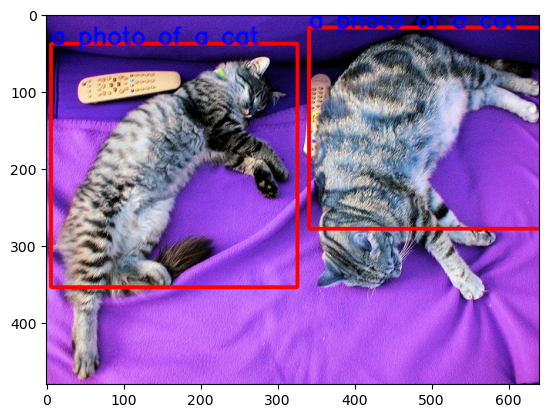

In [ ]:
cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
    # if score < thres: continue
    box = [round(i, 2) for i in box.tolist()]
    y1, x1, y2, x2 = box
    x1= int(x1); y1= int(y1); x2= int(x2); y2= int(y2)
    cv2.rectangle(cv_image,(y1,x1),(y2,x2),(255,0,0),3)
    cv2.putText(cv_image, text[label], (y1,x1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
cv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_image)
plt.show()

In [ ]:
target_sizes

tensor([[480., 640.]])